In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [2]:
def createStates(stationCapacity, maxArrivals):
    S = []
    V_t1 = {}
    V_t = {}
    newPolicy = {}
    oldPolicy = {}
    for state1 in range(0, stationCapacity + 1):
        for state2 in range(0, stationCapacity + 1):
            for state3 in range(0, stationCapacity + 1):
                for state4 in range(0, stationCapacity + 1):
                    for state5 in range(0, stationCapacity + 1):
                        S.append([state1, state2, state3, state4, state5])
                        V_t1[(state1, state2, state3, state4, state5)] = 0
                        V_t[(state1, state2, state3, state4, state5)] = 0
                        newPolicy[(state1, state2, state3, state4, state5)] = random.randint(0,1)
                        oldPolicy[(state1, state2, state3, state4, state5)] = random.randint(0,1)
                        
    
    E = []
    for env1 in range(1, maxArrivals + 1):
        for env2 in range(1, maxArrivals + 1):
            for env3 in range(1, maxArrivals + 1):
                for env4 in range(1, maxArrivals + 1):
                    for env5 in range(1, maxArrivals + 1):
                        E.append([env1, env2, env3, env4, env5])
    return S, V_t1, V_t, newPolicy, oldPolicy, E

In [3]:
def getReward(c_f, c_h, a, s, K, stationCapacity):
    return a * c_f + sum(getNextState(a, s, K, stationCapacity) * c_h)

In [4]:
def getNextState(a, s, K, stationCapacity, env=np.array([0,0,0,0,0])):
    s=np.clip(np.add(s, env), 0, stationCapacity)
    s_prime = s.copy()
    if a == 1:
        for i in range(len(s_prime)-1, -1, -1):
            s_prime[i] = max(s_prime[i] - K, 0)
            K -= np.abs(s[i] - s_prime[i])
    return s_prime

In [5]:
def getExpectedValue(environments, state, S, action, shuttleCapacity, stationCapacity, V_prime, reward, discount):
    value = 0
    for env in environments:
        s_prime = getNextState(action, state, shuttleCapacity, stationCapacity, env)
        # calculate the expectation given the uniform distribution of five possibilities
        value += 1/len(E) * V_prime[tuple(s_prime)]
    # expected total value given the state and the action
    return reward + discount * value

In [6]:
def enumeration(T, S, A, E, K, stationCapacity, c_f, c_h, d, V_t1, V_t):
    for t in range(T, -1, -1):
        for s in S:
            expectedValues = []
            for a in A:
                # calculate the reward based on the action and state
                reward = getReward(c_f, c_h, a, s, K, stationCapacity)
                expectedValues.append(getExpectedValue(E, s, S, a, K, stationCapacity, V_t1, reward, d))
            V_t[tuple(s)] = max(expectedValues)
        V_t1 = V_t.copy()
    plot_values = []
    for i in range(stationCapacity + 1):
        plot_values.append(V_t1[(0,0,0,0,i)])
    plt.plot(plot_values)
    return plt.show()

In [7]:
stationCapacity = 2
maxArrivals = 5
S, V_t1, V_t, newPolicy, oldPolicy, E = createStates(stationCapacity, maxArrivals)

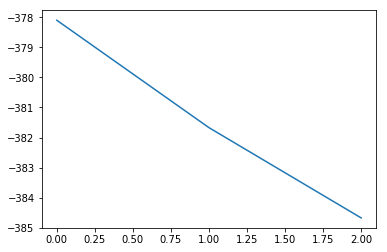

12181.317658662796

In [8]:
start = time.time()
T = 500
A = [0, 1]
K = 30
c_f = -100
c_h = np.array([-1, -1.5, -2, -2.5, -3])
d = 0.95
V_t1 = enumeration(T, S, A, E, K, stationCapacity, c_f, c_h, d, V_t1, V_t)
end = time.time()
end - start